Importamos las librerias necesarias y leemos los archivos recibidos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dftest = pd.read_parquet('proyecto_ML/test.parquet')
dftrain = pd.read_parquet('proyecto_ML/train.parquet')
dftrain.head()

Revisamos las columnas, la cantidad de nulos y los tipos de datos.

In [3]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

Verificamos la descripcion estadistica de las columnas.

In [4]:
dftrain.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


Generamos un histograma para las columnas con mayor variación para verificar visualmente la cantidad de datos.

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'sqfeet'}>],
       [<AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'baths'}>]], dtype=object)

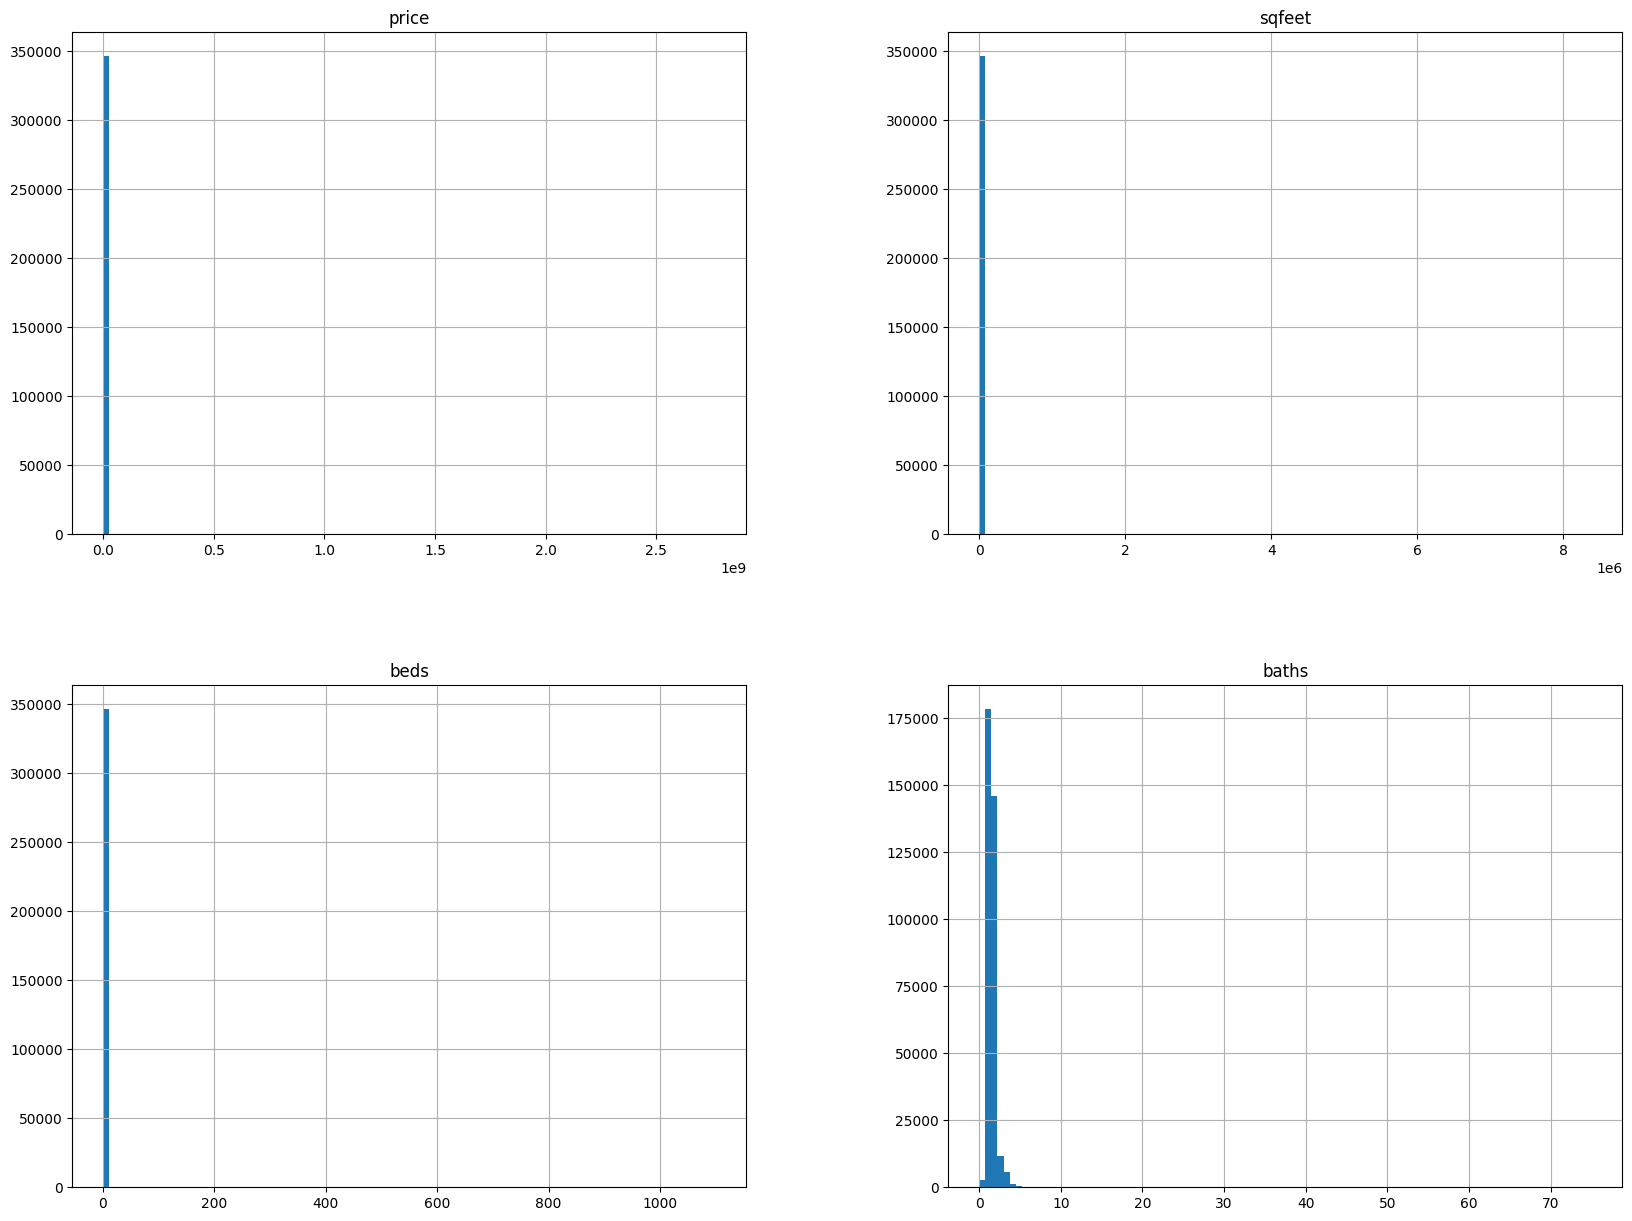

In [80]:
dfnumeric = dftrain[['price', 'sqfeet', 'beds', 'baths']]
dfnumeric.hist(bins=100, figsize=(20,15))

Generamos un boxplot por columna para remover outliers.

<AxesSubplot: >

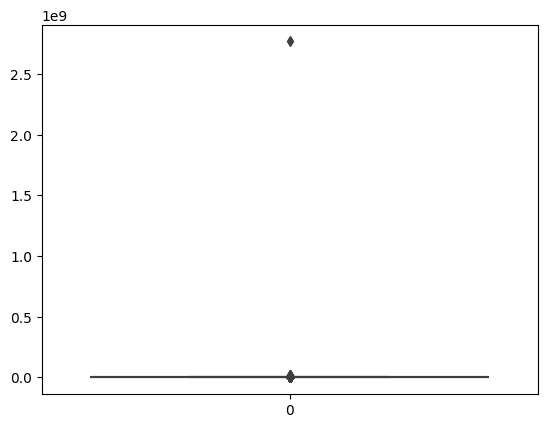

In [65]:
#Box Plot
import seaborn as sns
sns.boxplot(dfnumeric['price'])
#sns.boxplot(dfnumeric['sqfeet'])
#sns.boxplot(dfnumeric['beds'])
#sns.boxplot(dfnumeric['baths'])

Removemos los outliers de cada columna y verificamos la cantidad de elementos eliminados.

cantidad de precios excluidos
7128
cantidad de pies cuadrados excluidos
3735
cantidad de camas excluidos
3
cantidad de banos excluidos
3


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'sqfeet'}>],
       [<AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'baths'}>]], dtype=object)

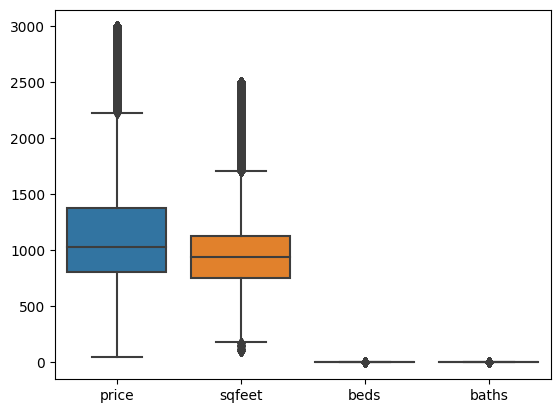

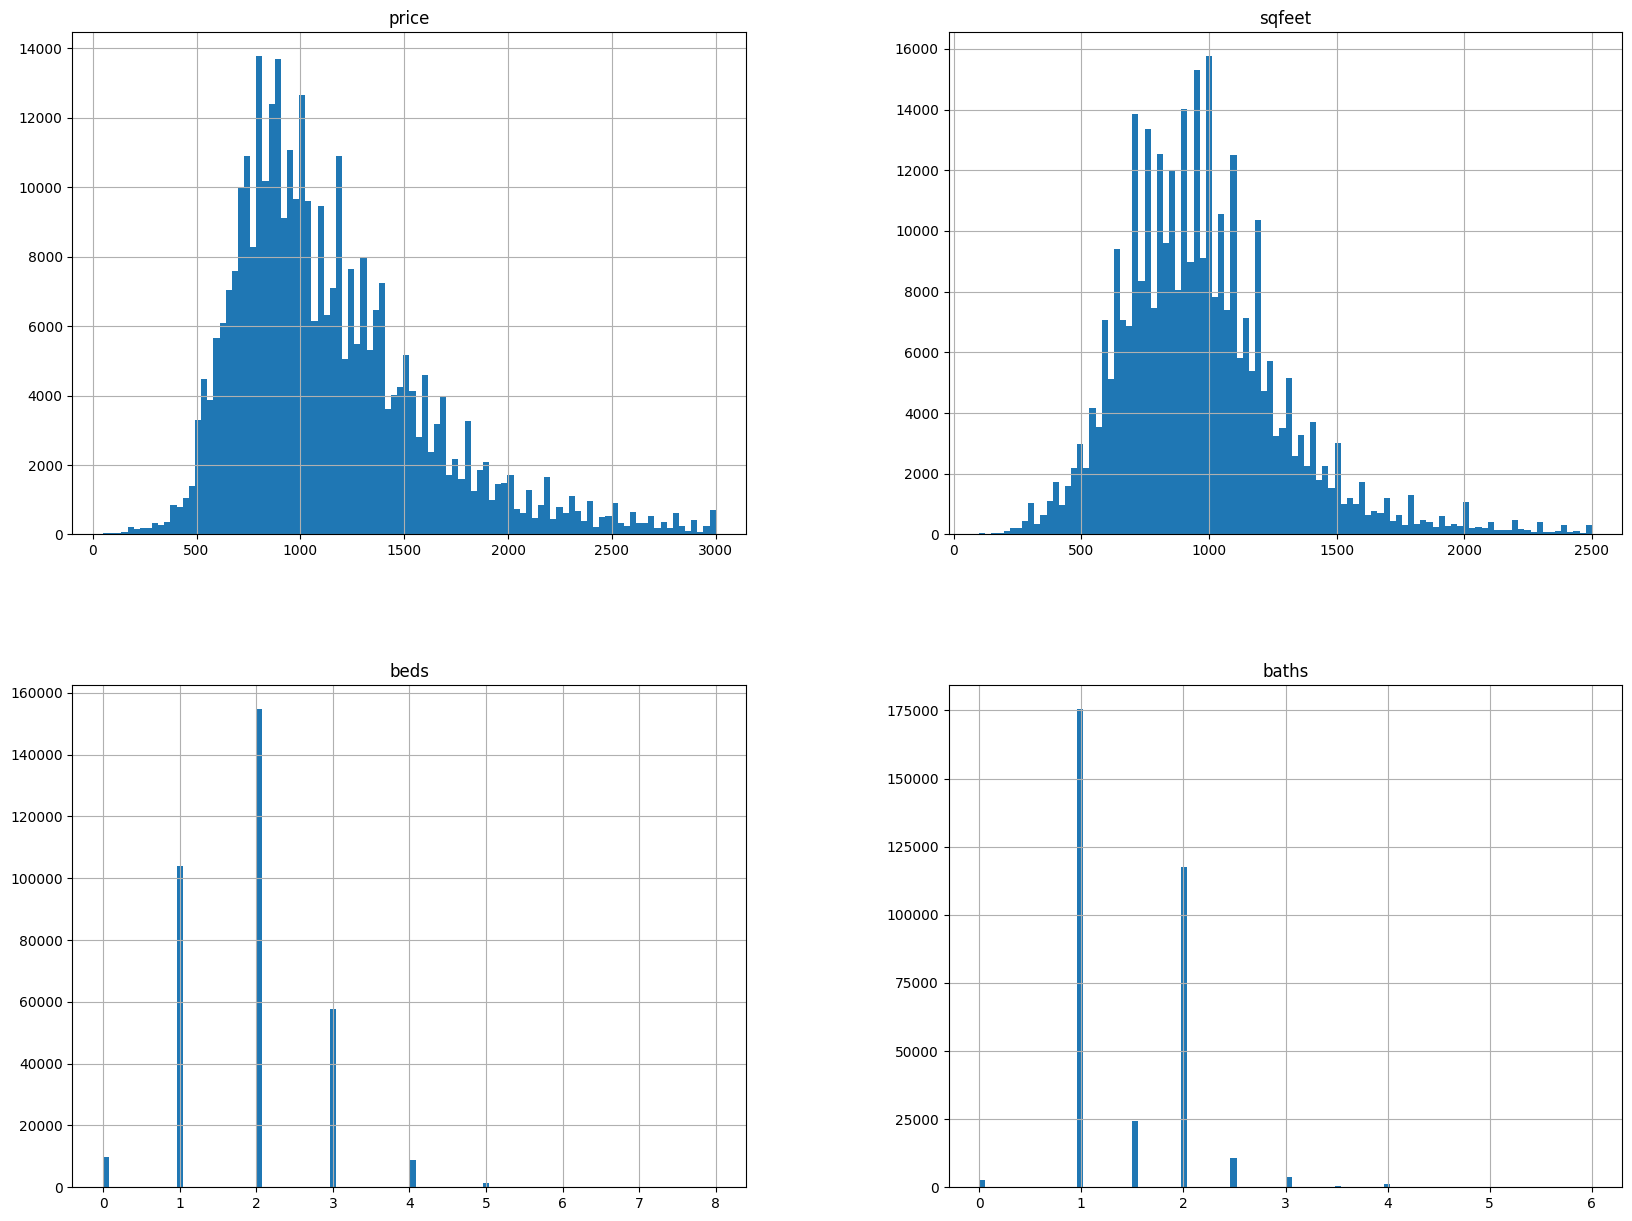

In [127]:
df_filtered = dfnumeric.loc[(dfnumeric['price'].between(50,3000)) & (dfnumeric['sqfeet'].between(100,2500)) & (dfnumeric['beds'].between(0,100)) & (dfnumeric['baths'].between(0,10))]
print("cantidad de precios excluidos")
print(346479 - len(dfnumeric[dfnumeric['price'].between(50,3000)].index))
print("cantidad de pies cuadrados excluidos")
print(346479 - len(dfnumeric[dfnumeric['sqfeet'].between(100,2500)].index))
print("cantidad de camas excluidos")
print(346479 - len(dfnumeric[dfnumeric['beds'].between(0,100)].index))
print("cantidad de banos excluidos")
print(346479 - len(dfnumeric[dfnumeric['baths'].between(0,10)].index))
#sns.boxplot(df_filtered['price'])
sns.boxplot(df_filtered)
df_filtered.hist(bins=100, figsize=(20,15))


Generamos un heatmap, un counplot y un pairplot de estas columnas para ver su correlación.

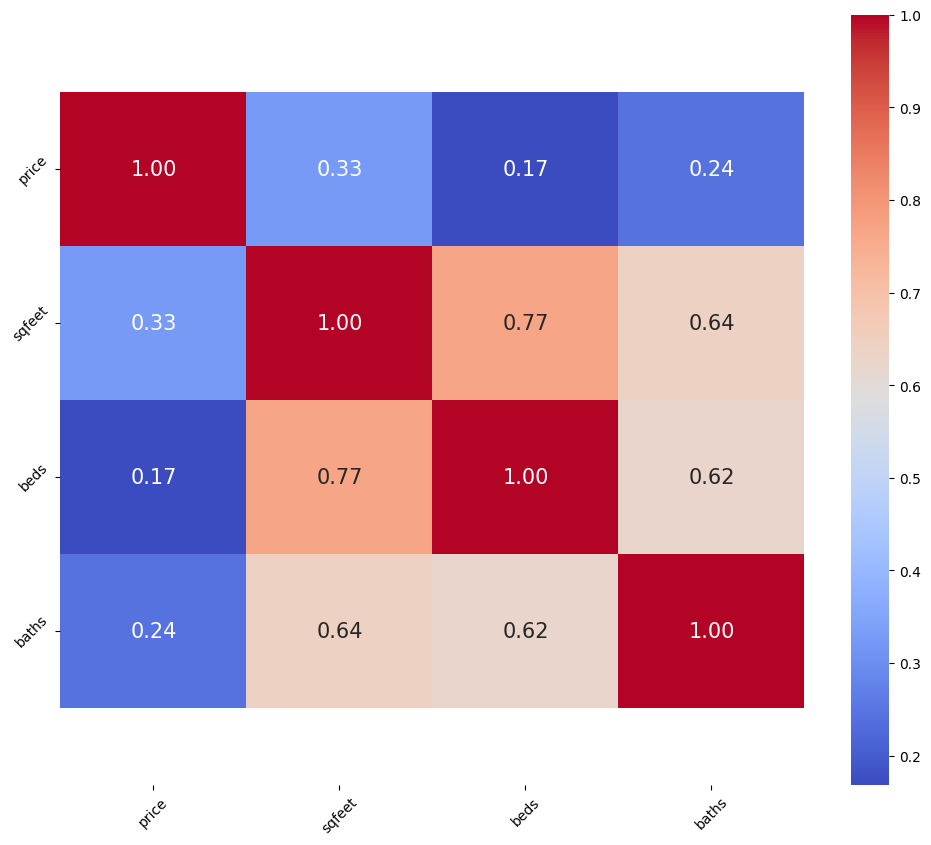

In [128]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
dfheatmap = df_filtered
corr = dfheatmap.corr(numeric_only=True)
plot_corre_heatmap(corr)

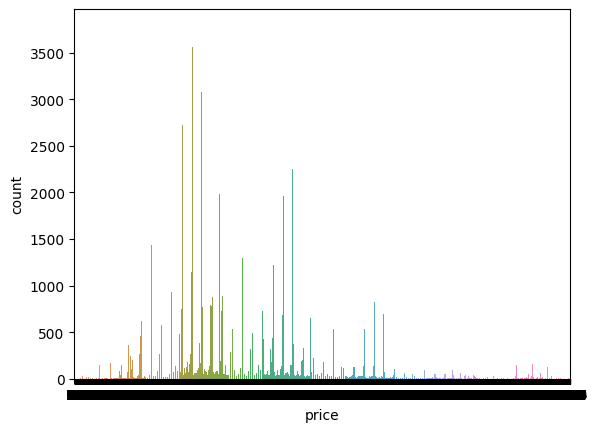

In [129]:
sns.countplot(x='price', data=dfheatmap) 
plt.show()

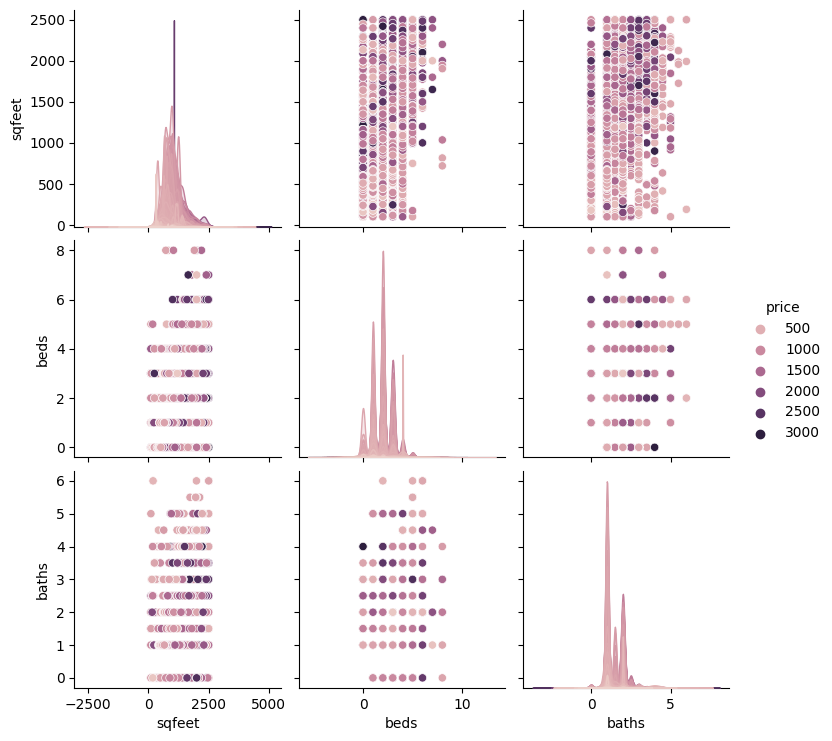

In [130]:
sns.pairplot(dfheatmap, hue = 'price')
plt.show()

Verificamos las posiciones de las coordenadas recividas.

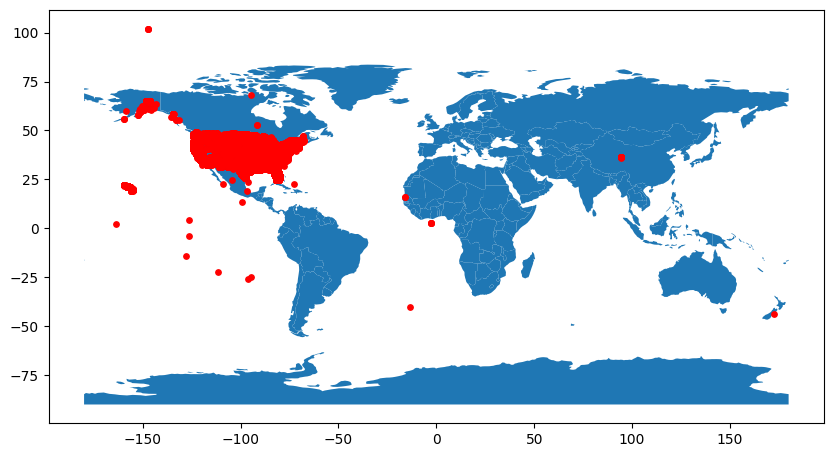

In [152]:
#LOCACIÓN
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(dftrain['long'], dftrain['lat'])]
gdf = GeoDataFrame(dftrain, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Filtramos los elementos fuera de los extremos limite del territorio de Estados Unidos, pero incluyendo las filas que se encuentren en el estado de Hawaii y Alaska. Además se veridica la cantidad de elementos fitlrados.

Cantidad original: 346479
Cantidad filtrada: 344538


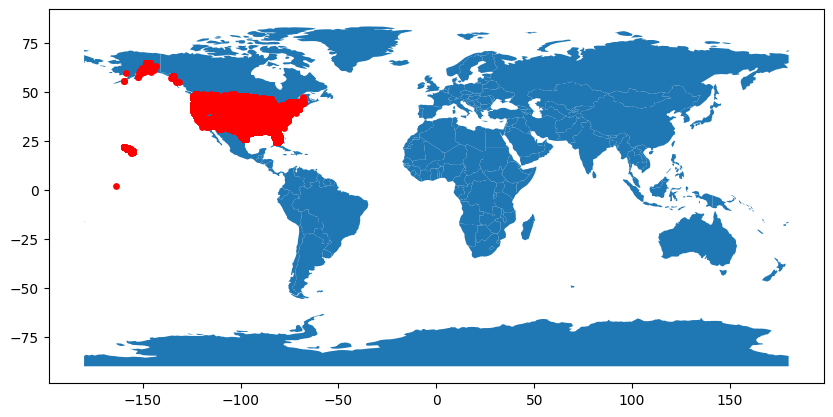

In [153]:
df2 = dftrain[ ((dftrain['lat'] < 49.38) & (dftrain['lat'] > 24.52) & (dftrain['long'] < -66.94 ) & (dftrain['long'] > -124.73 )) | (dftrain['state'] == 'hi') | (dftrain['state'] == 'ak') ]
print('Cantidad original: ' + str(len(dftrain.index)))
print('Cantidad filtrada: ' + str(len(df2.index)))
geometry = [Point(xy) for xy in zip(df2['long'], df2['lat'])]
gdf = GeoDataFrame(df2, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);